#Description: This model predicts breast cancer based on collected data.

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data loading
from google.colab import files
upload = files.upload()
df = pd.read_csv('breast_cancer.csv')
df.head()

Saving breast_cancer.csv to breast_cancer.csv


,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

# Data cleaning

In [4]:
# counting # of empty data
df.isna().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# if any duplicate datas present for redundancy purpose
df.duplicated().sum()

0

In [6]:
# Get the count of different diagnosis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# So from the data we can say that 212 patients has Malignant(M) and 357 Benign(B) cells

*Data Visualisaiton*

<Axes: xlabel='diagnosis', ylabel='count'>

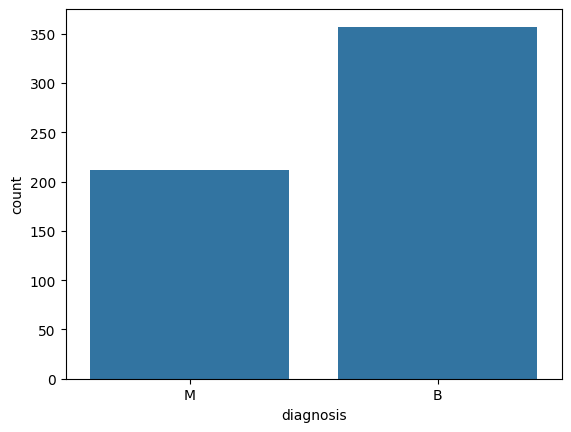

In [7]:
sns.countplot(df, x="diagnosis")

In [8]:
# look at the data types to change it into a numerical value
df.dtypes

id                           int64
diagnosis                   object
Radius_mean                float64
Texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
#Encoding the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [10]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


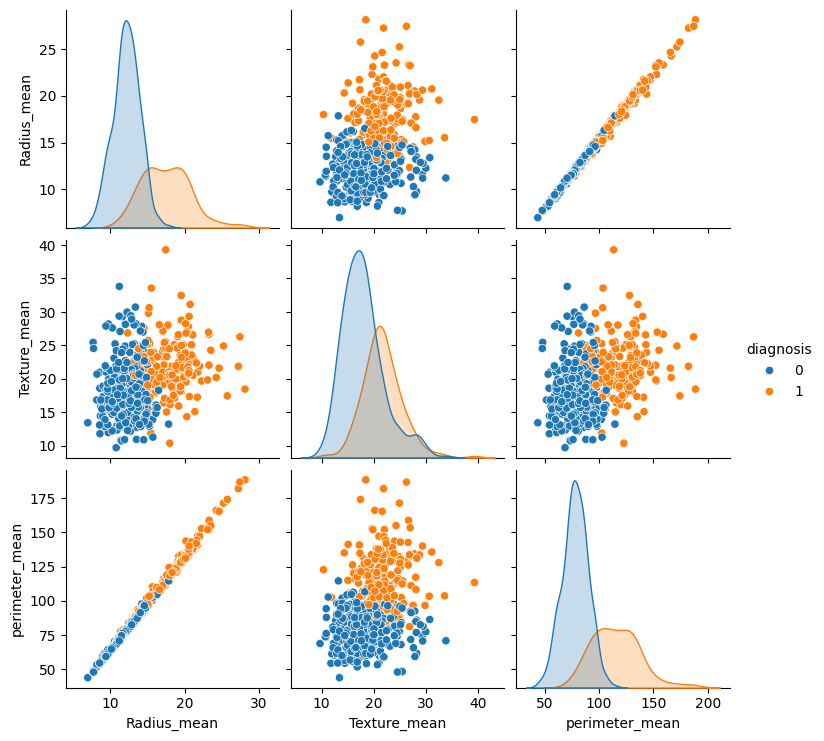

In [11]:
sns.pairplot(df.iloc[:,1:5], hue="diagnosis")

In [12]:
# Get the correlation between all cols
df.corr()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099365,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.417232,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
Radius_mean,0.074626,0.730029,1.000000,0.326716,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Texture_mean,0.099365,0.417232,0.326716,1.000000,0.332231,0.324149,-0.024737,0.235863,0.302324,0.294307,...,0.355463,0.911275,0.360485,0.346576,0.076875,0.277075,0.300731,0.297040,0.104590,0.119644
perimeter_mean,0.073159,0.742636,0.997855,0.332231,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.324149,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.024737,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.235863,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302324,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.294307,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Axes: >

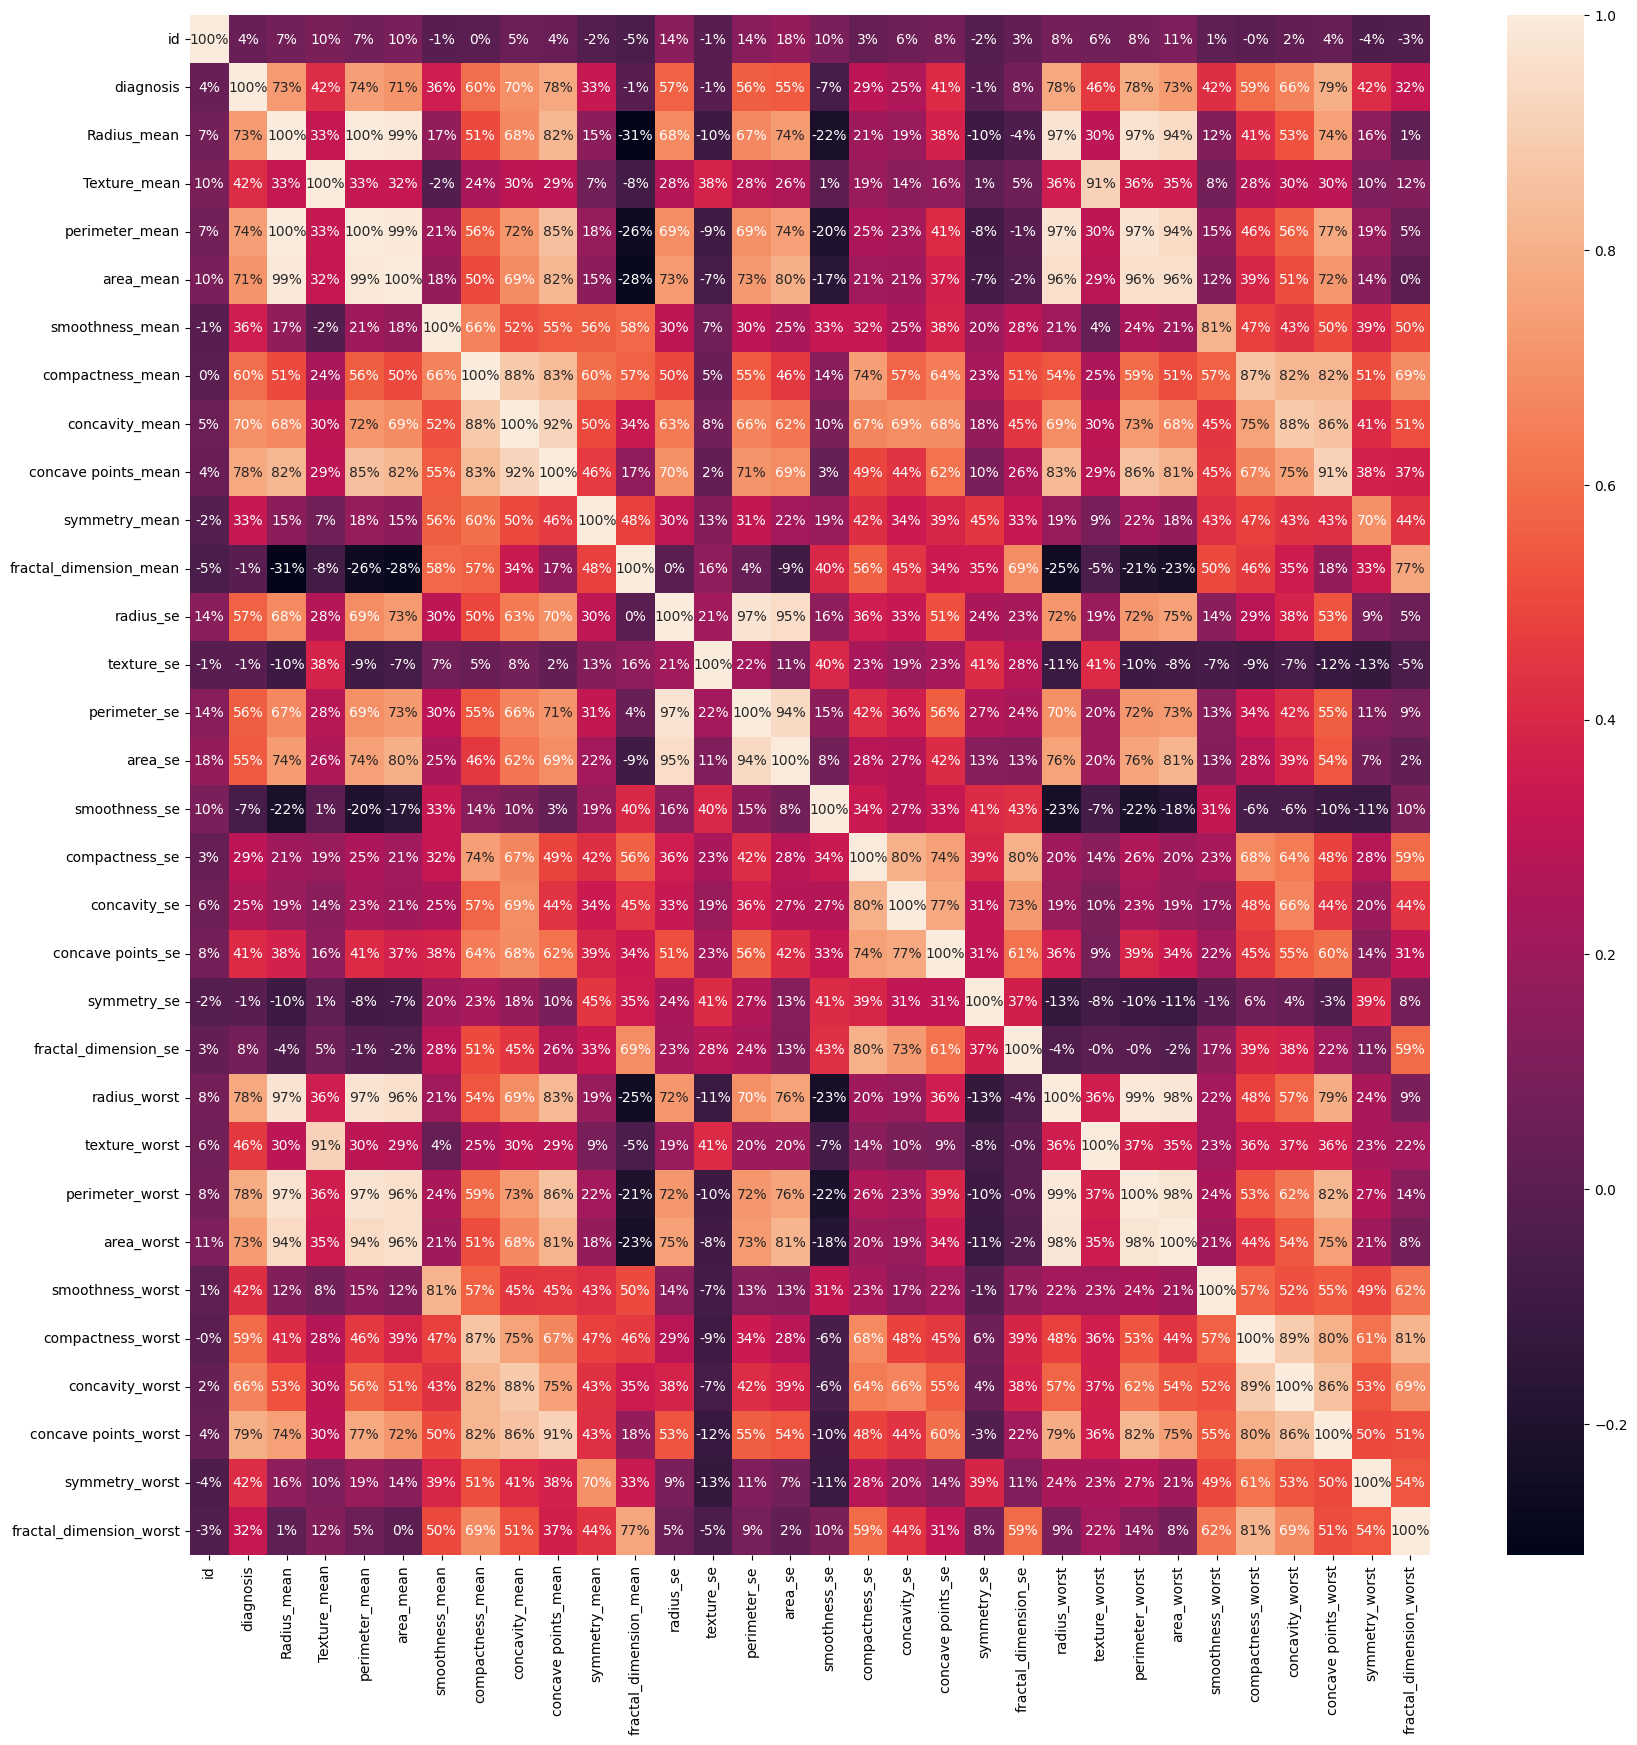

In [13]:
# Visualizing the correlation between cols
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

In [14]:
# symmetry_se, smoothness_se, texture_se, fractal_dimension_mean has negetive impact with diagnosis(the output) so gonna drop
df.drop(["symmetry_se", "smoothness_se", "texture_se", "fractal_dimension_mean"], axis ="columns", inplace = True)

In [15]:
# perimeters are correlated with radiuses so can drop
df.drop(["perimeter_mean", "perimeter_se", "perimeter_worst"], axis = "columns", inplace = True)

<Axes: >

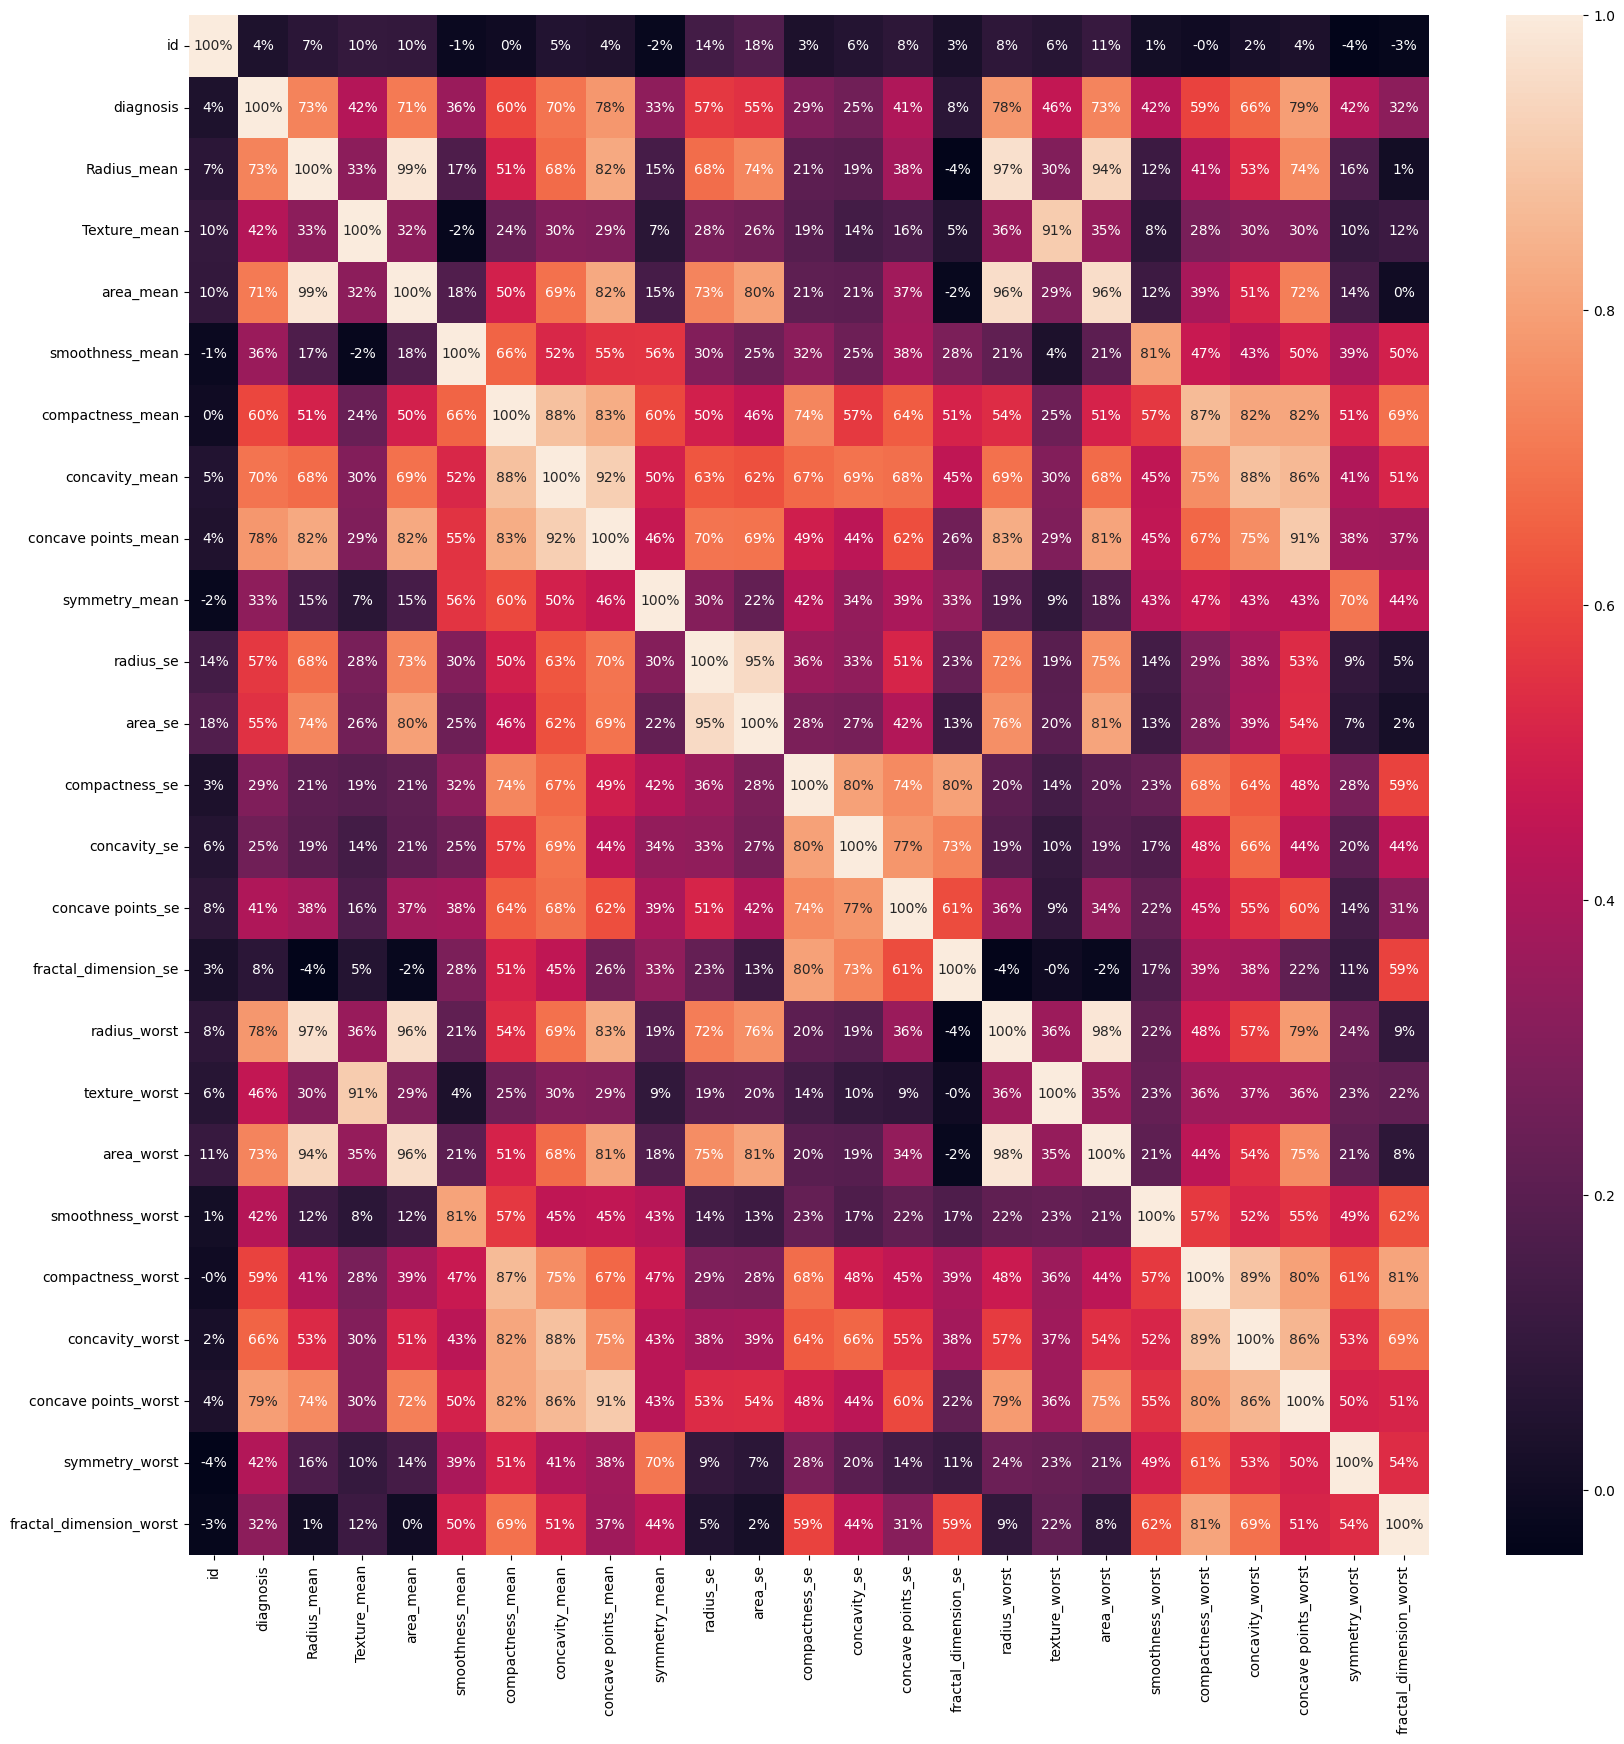

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

In [17]:
#area and radiuses are also correlated so can drop
df.drop(["area_mean", "area_se", "area_worst"], axis = "columns", inplace = True)

In [18]:
# fractal_dimension_se is less related to diagnosis so drop
df.drop(["fractal_dimension_se"], axis = "columns", inplace = True)

<Axes: >

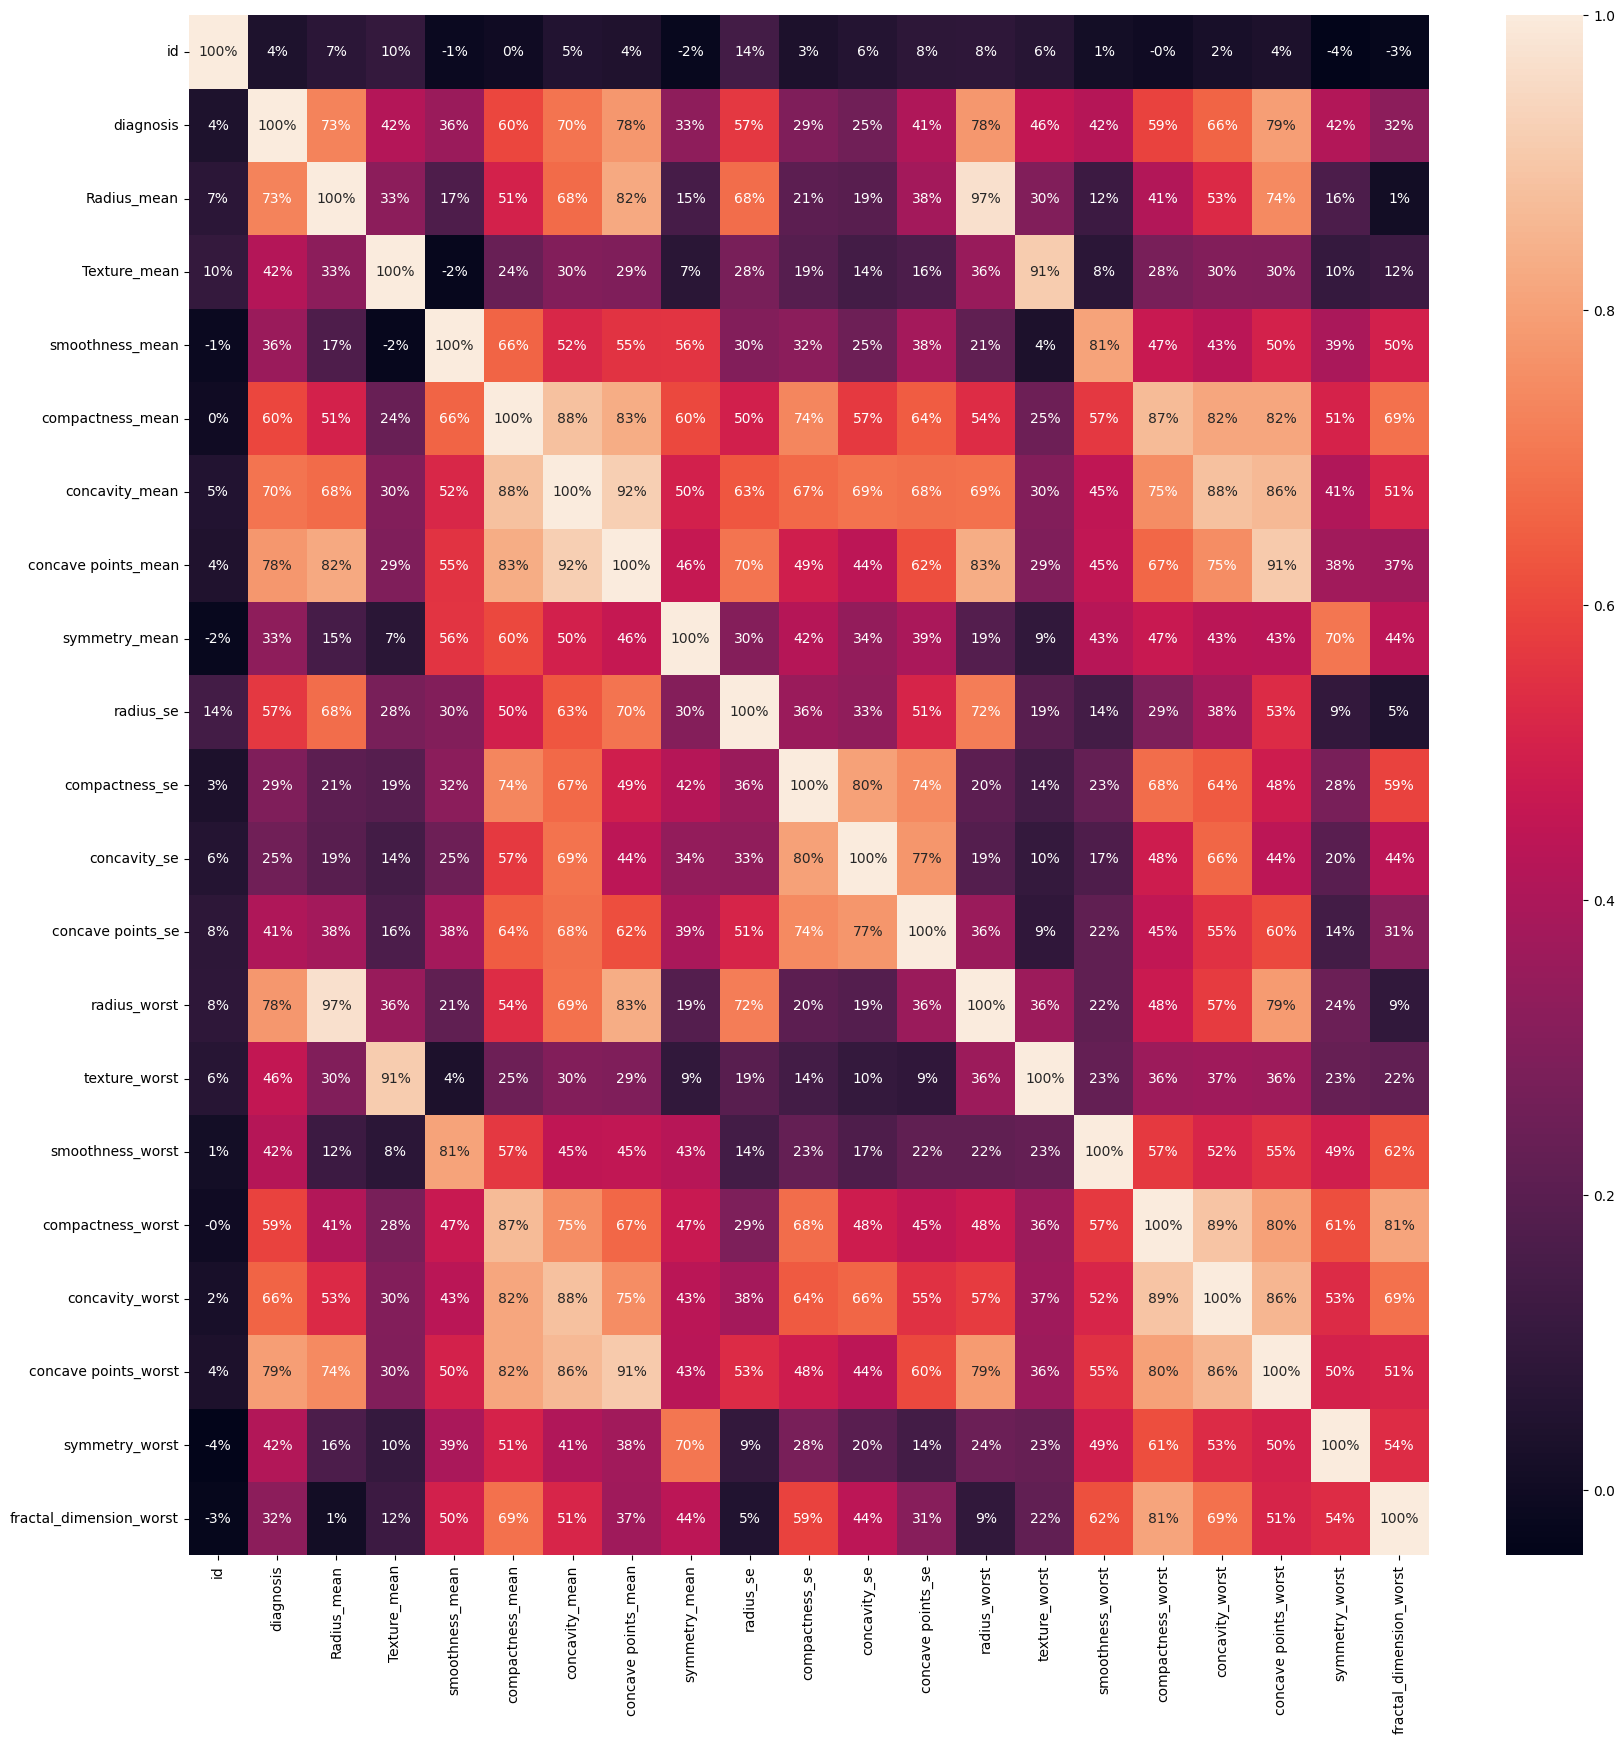

In [19]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

In [20]:
#texture_worst is 91% correlated to texture_mean and texture_worst is putting more impact on diagnosis so drop texture_mean
df.drop(["Texture_mean"], axis = "columns", inplace = True)

In [21]:
# Spliting dependent(Y) and independent(X) data
X = df.drop(["id", "diagnosis"], axis = "columns")

In [22]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [23]:
Y = df["diagnosis"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [33]:
Y_train = pd.to_numeric(Y_train)

In [35]:
Y_train = np.array(Y_train)
Y_train = Y_train.ravel()

In [37]:
from sklearn.utils import check_array
check_array(Y_train, ensure_2d=False, dtype=None)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [41]:
Y_test = pd.to_numeric(Y_test)
Y_test = np.array(Y_test)
Y_test = Y_test.ravel()
check_array(Y_test, ensure_2d=False, dtype=None)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

#'Model Creation'

In [38]:
def models(X_train, Y_train):

  #Logistic regression
  from sklearn.linear_model import LogisticRegression
  logr = LogisticRegression(random_state = 0)
  logr.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Model accuracy on training data
  print("[0]Logr Training Accuracy: ",logr.score(X_train, Y_train))
  print("[1]Tree Training Accuracy: ",tree.score(X_train, Y_train))
  print("[2]Forest Training Accuracy: ",forest.score(X_train, Y_train))

  return logr, tree, forest

In [39]:
#Getting all the model accuracy
model = models(X_train, Y_train)

[0]Logr Training Accuracy:  0.9882629107981221
[1]Tree Training Accuracy:  1.0
[2]Forest Training Accuracy:  0.9929577464788732


In [42]:
# Confusion matrix on test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print('Model: ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FP = cm[0][1]
  FN = cm[1][0]

  print(cm)
  print("Testing Accuracy: ", (TP + TN)/(TP + TN + FP + FN))
  print()

Model:  0
[[89  1]
 [ 3 50]]
Testing Accuracy:  0.972027972027972

Model:  1
[[86  4]
 [ 2 51]]
Testing Accuracy:  0.958041958041958

Model:  2
[[89  1]
 [ 4 49]]
Testing Accuracy:  0.965034965034965



In [43]:
# Another way to show the matrix of different models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97   

In [46]:
# Model with the highest accuracy
import pickle
pickle.dump(model[0], open("BreastCancerlogr.pkl", "wb"))

In [45]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(Scaler, f)